This notebook investigates the properties of constraint propagation algorithms, namely PC-1 (enforcing path consistency).

In [2]:
from exact_solver import solve, solve_stp
from problem_generator import generate_problem 
from preprocessing import PC_1

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

In [3]:
from problem_sets import SIMPLE, BINARY

Let's find out, given UNSAT problems, if it deduces it right.

In [5]:
# First we need to create a dataset of interesting unsatisfiable problems.
# Let's say, 50 BINARY problems in the interesting region.

num_tests = 50

Ts_unsat = []
while len(Ts_unsat) < num_tests:
    print(len(Ts_unsat), end=', ')
    T = generate_problem(**{ **BINARY, 'scaling_factor': 0.5} )
    if not solve(T, backjump=False):
        Ts_unsat.append( T )
print('Done')

0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 

KeyboardInterrupt: 

In [5]:
num_deduced = 0
for T in Ts_unsat:
    sol = PC_1(T)
    if sol is None: num_deduced += 1

print(num_deduced / num_tests)

1.0


What if constraint probability is varied?

In [21]:
# what we will do is try to generate num_tests problems for each constraint probability
# if it fails to generate unsat problems just move on
num_tests = 30

probs = []
T_list = []

for prob in range(40, 50, 2):
    tests = []
    for k in range(num_tests):
        print(k, end=' ')
        # it seems in order for the problems to be interesting for this graph,
        # we need to have unsat problem, but that have ok sized intervals
        
        T = generate_problem(**{ **BINARY, 'constraint_probability': prob/100, 'scaling_factor': 0.2} )
        if not solve(T, backjump=False):
            tests.append( T )
        
    probs.append(prob)
    T_list.append(tests)
    print(prob, end=', ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 40, 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 42, 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 44, 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 46, 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 48, 

40 29 None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
29
42 29 None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
29
44 29 None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
29
46 28 None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
28
48 30 None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
30


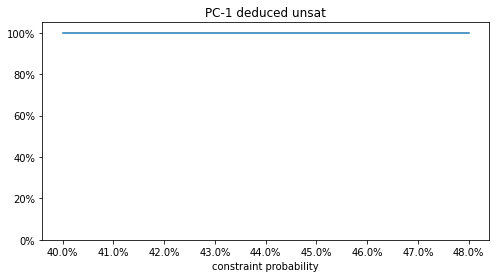

In [22]:
fig, ax = plt.subplots(1, figsize=(8, 4))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('constraint probability')
ax.set_title('PC-1 deduced unsat')
ax.set_ylim(0, 105)

graph_deduceds = []
for p, Ts in zip(probs, T_list):
    print(p, len(Ts), end=' ')
    if len(Ts) == 0:
        graph_deduceds.append(0) # TODO deal with this case
        continue
    
    num_deduced = 0
    for T in Ts:
        sol = PC_1(T)
        print(sol)
        if sol is None: num_deduced += 1
    print(num_deduced)
    graph_deduceds.append( 100 * num_deduced / len(Ts) )
    
ax.plot(probs, graph_deduceds)

In [24]:
# ???? what?